### importing required packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pylab
import scipy.stats as stat
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# loading the dataset

data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pd.set_option('display.Max_columns',None)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### feature engineering and feature selection

In [4]:
# getting the features which has year in it
year_feat= ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

In [5]:
# segregating according to the different type of features
num_feat = [ f for f in data.columns if data[f].dtype != 'O']
disc_feat = [f for f in num_feat if len(data[f].value_counts())<20 and f not in year_feat]
conti_feat = [f for f in num_feat if f not in disc_feat and f not in year_feat]
cat_feat = [f for f in data.columns if data[f].dtype =='O' and f not in year_feat]

In [6]:
# getting the different types of variables

print('disc_feat')
for f in disc_feat:
    if data[f].isnull().sum()>0:
        print(f,'-',data[f].isnull().sum(),'-',data[f].isnull().mean())
print()
print('conti_feat')
for f in conti_feat:
    if data[f].isnull().sum()>0:
        print(f,'-',data[f].isnull().sum(),'-',data[f].isnull().mean())
print()
print('cat_feat')
for f in cat_feat:
    if data[f].isnull().sum()>0:
        print(f,'-',data[f].isnull().sum(),'-',data[f].isnull().mean())
print()
print('year_feat')
for f in year_feat:
    if data[f].isnull().sum()>0:
        print(f,'-',data[f].isnull().sum(),'-',data[f].isnull().mean())

disc_feat

conti_feat
LotFrontage - 259 - 0.1773972602739726
MasVnrArea - 8 - 0.005479452054794521

cat_feat
Alley - 1369 - 0.9376712328767123
MasVnrType - 8 - 0.005479452054794521
BsmtQual - 37 - 0.025342465753424658
BsmtCond - 37 - 0.025342465753424658
BsmtExposure - 38 - 0.026027397260273973
BsmtFinType1 - 37 - 0.025342465753424658
BsmtFinType2 - 38 - 0.026027397260273973
Electrical - 1 - 0.0006849315068493151
FireplaceQu - 690 - 0.4726027397260274
GarageType - 81 - 0.05547945205479452
GarageFinish - 81 - 0.05547945205479452
GarageQual - 81 - 0.05547945205479452
GarageCond - 81 - 0.05547945205479452
PoolQC - 1453 - 0.9952054794520548
Fence - 1179 - 0.8075342465753425
MiscFeature - 1406 - 0.963013698630137

year_feat
GarageYrBlt - 81 - 0.05547945205479452


### plots of descrete feature vs SalePrice

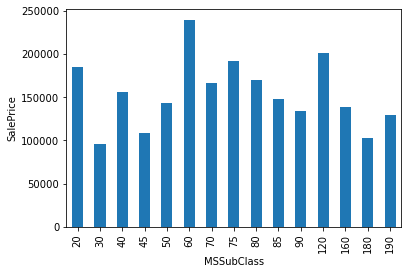

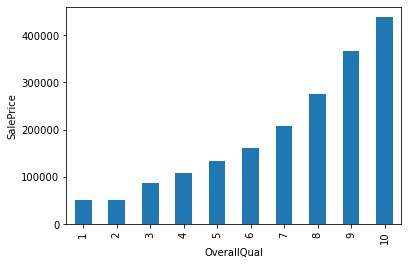

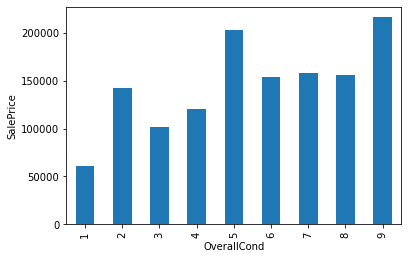

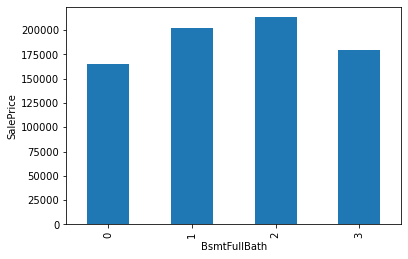

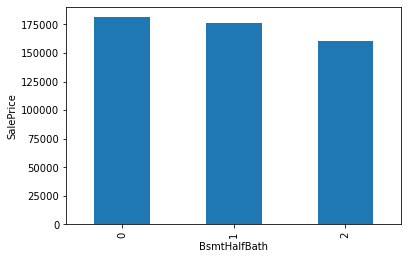

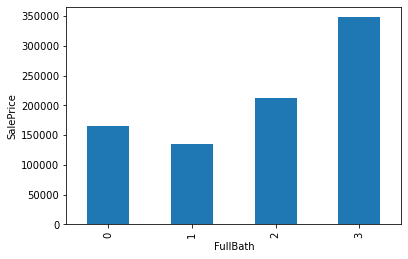

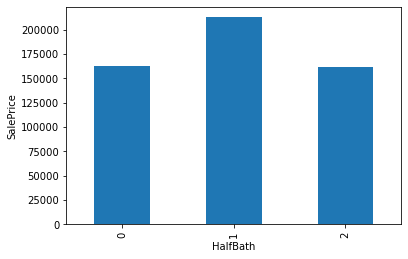

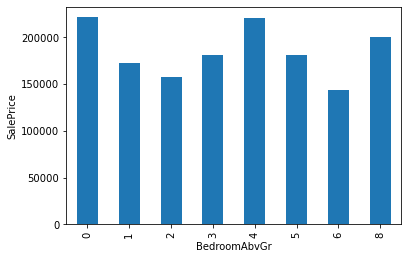

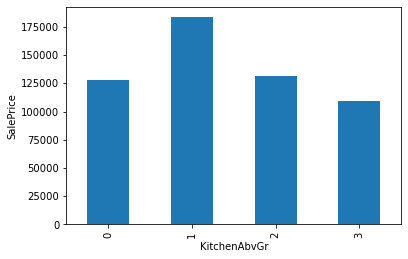

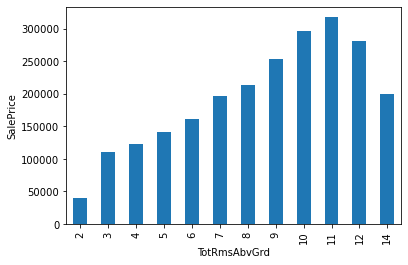

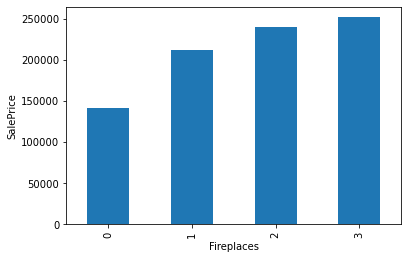

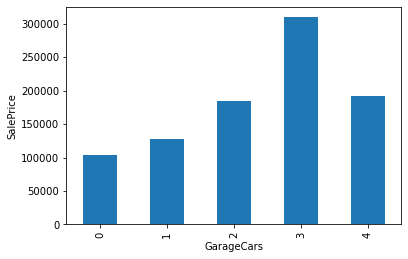

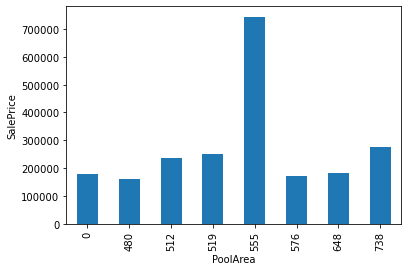

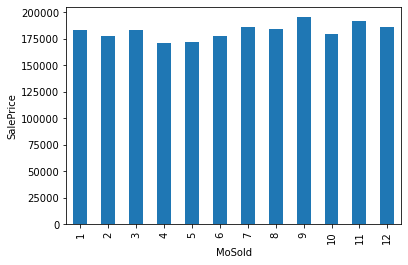

In [7]:
for feat in disc_feat:
    data.groupby(feat)['SalePrice'].mean().plot(kind='bar')
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.show()

### distribution of continuous feature

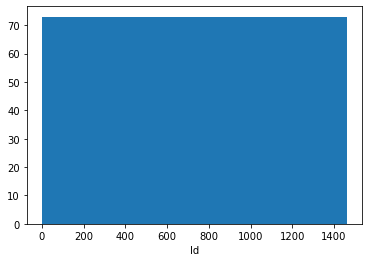

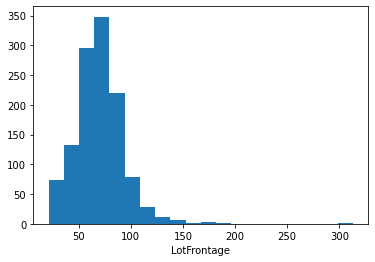

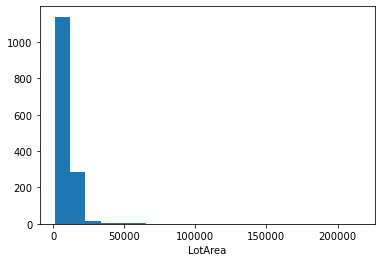

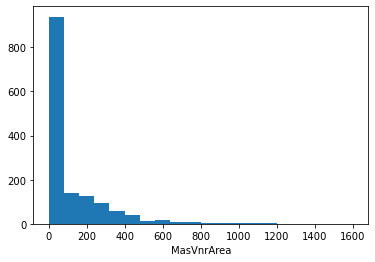

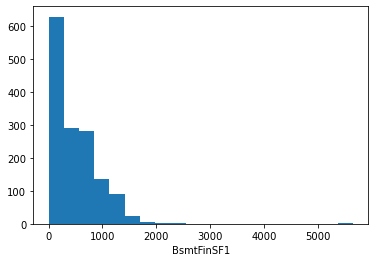

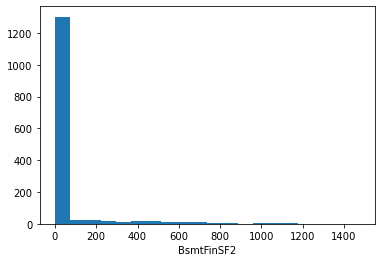

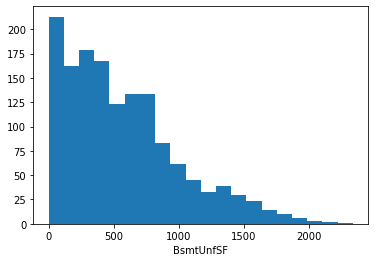

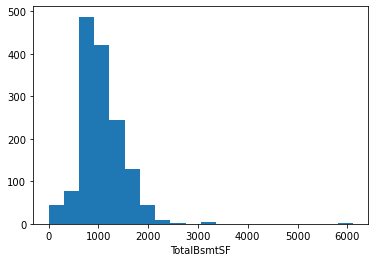

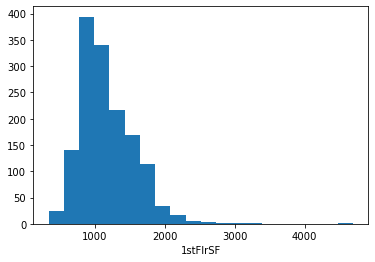

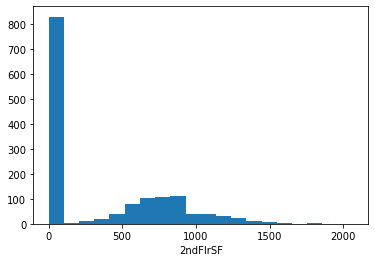

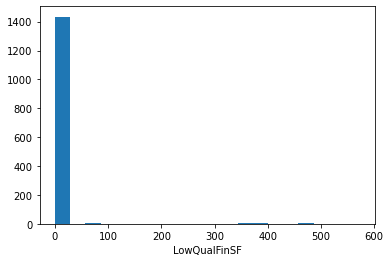

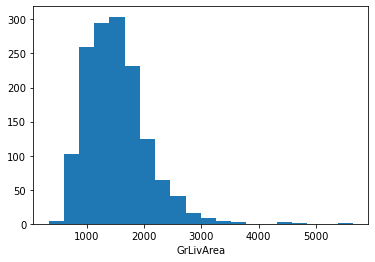

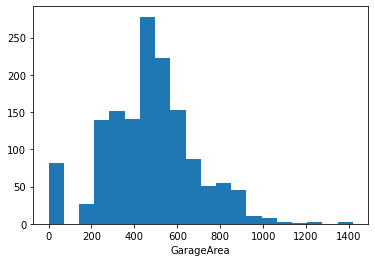

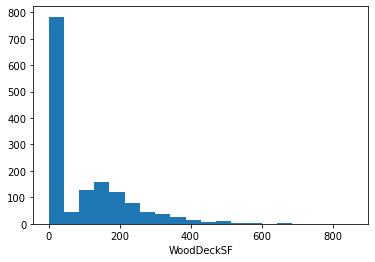

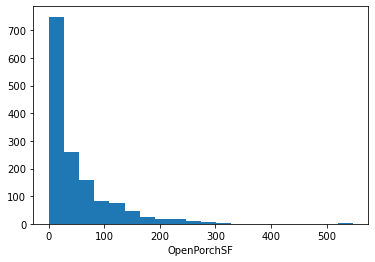

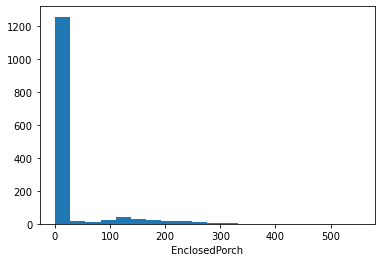

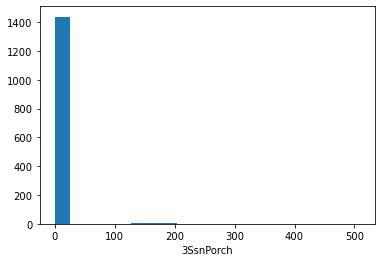

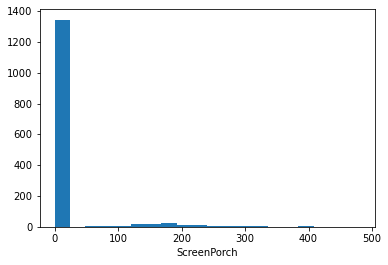

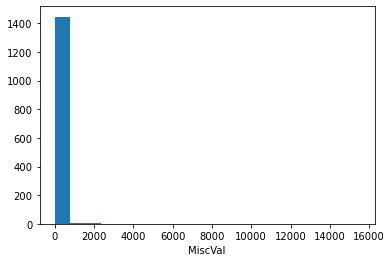

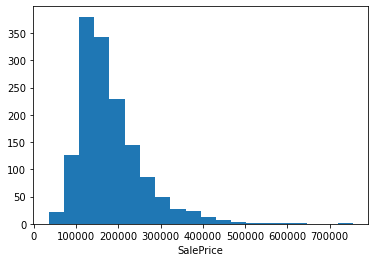

In [8]:
for feat in conti_feat:
    plt.hist(data[feat],bins = 20)
    plt.xlabel(feat)
    plt.show()

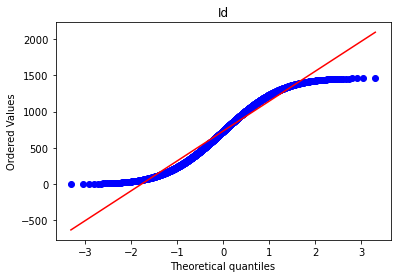

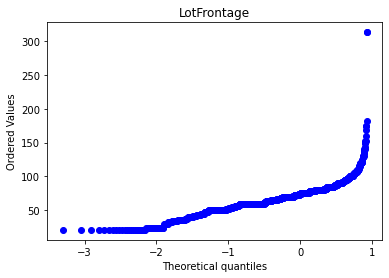

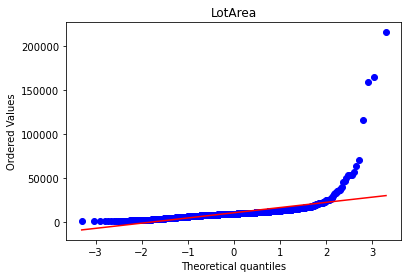

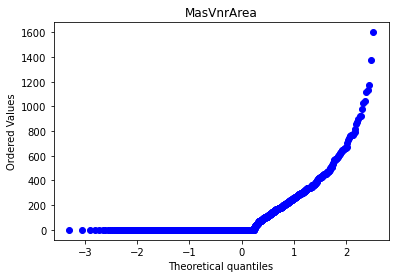

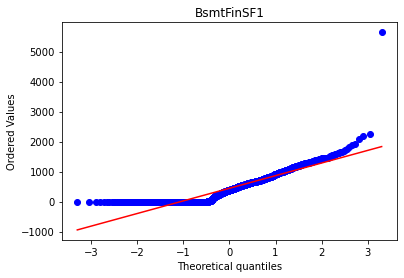

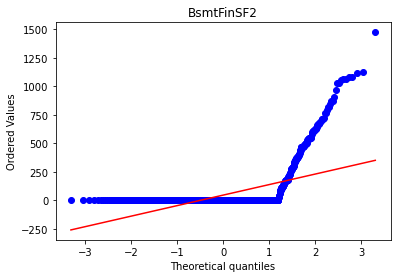

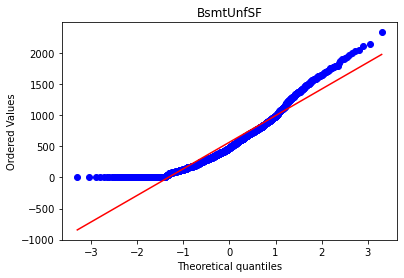

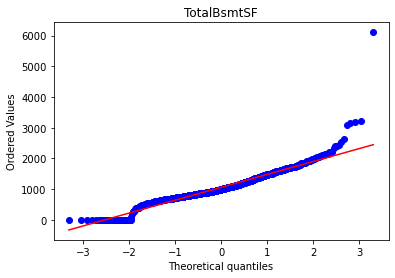

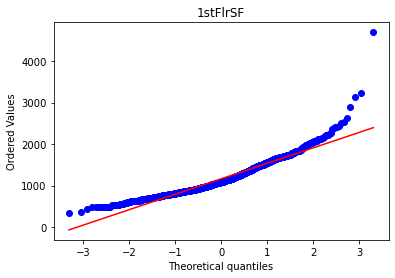

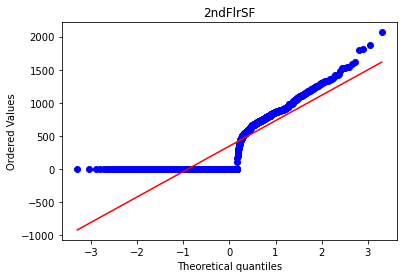

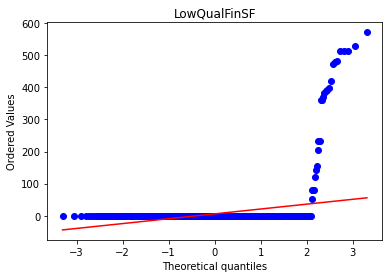

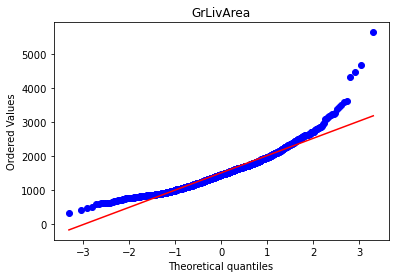

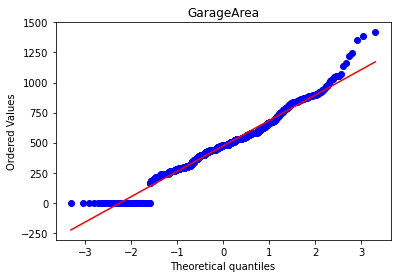

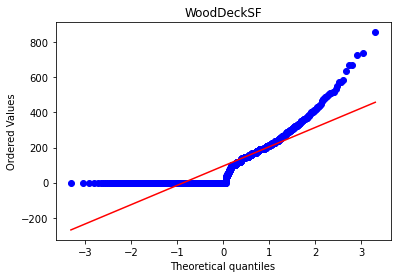

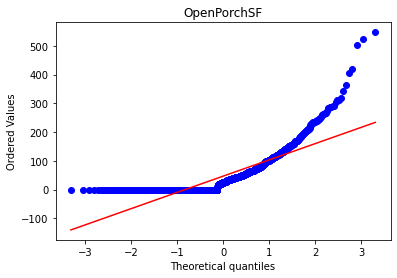

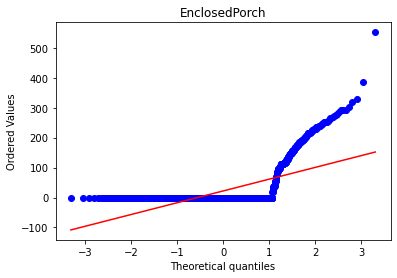

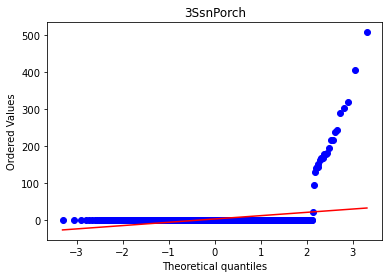

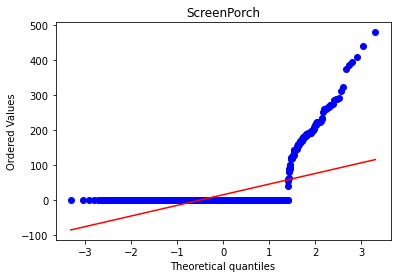

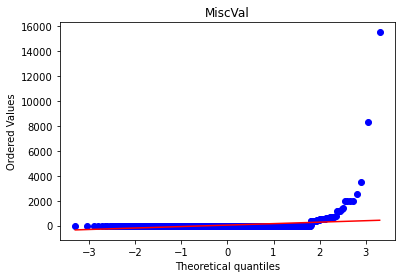

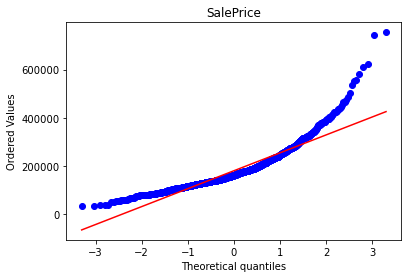

In [9]:
# prob plot to see whether continuous features are normally distributed or not
for feat in conti_feat:
    stat.probplot(data[feat],dist='norm',plot=plt,)
    plt.title(feat)
    plt.show()

#### checking the null data

In [10]:
null_feature = [i for i in data.columns if data[i].isnull().sum()>0]
for f in null_feature:
    print(f,'-',data[f].isnull().sum(),'-',data[f].isnull().mean())

LotFrontage - 259 - 0.1773972602739726
Alley - 1369 - 0.9376712328767123
MasVnrType - 8 - 0.005479452054794521
MasVnrArea - 8 - 0.005479452054794521
BsmtQual - 37 - 0.025342465753424658
BsmtCond - 37 - 0.025342465753424658
BsmtExposure - 38 - 0.026027397260273973
BsmtFinType1 - 37 - 0.025342465753424658
BsmtFinType2 - 38 - 0.026027397260273973
Electrical - 1 - 0.0006849315068493151
FireplaceQu - 690 - 0.4726027397260274
GarageType - 81 - 0.05547945205479452
GarageYrBlt - 81 - 0.05547945205479452
GarageFinish - 81 - 0.05547945205479452
GarageQual - 81 - 0.05547945205479452
GarageCond - 81 - 0.05547945205479452
PoolQC - 1453 - 0.9952054794520548
Fence - 1179 - 0.8075342465753425
MiscFeature - 1406 - 0.963013698630137


In [11]:
null_feature = [i for i in test.columns if test[i].isnull().sum()>0]
for f in null_feature:
    print(f,'-',test[f].isnull().sum(),'-',test[f].isnull().mean())

MSZoning - 4 - 0.0027416038382453737
LotFrontage - 227 - 0.15558601782042494
Alley - 1352 - 0.9266620973269363
Utilities - 2 - 0.0013708019191226869
Exterior1st - 1 - 0.0006854009595613434
Exterior2nd - 1 - 0.0006854009595613434
MasVnrType - 16 - 0.010966415352981495
MasVnrArea - 15 - 0.01028101439342015
BsmtQual - 44 - 0.03015764222069911
BsmtCond - 45 - 0.030843043180260453
BsmtExposure - 44 - 0.03015764222069911
BsmtFinType1 - 42 - 0.02878684030157642
BsmtFinSF1 - 1 - 0.0006854009595613434
BsmtFinType2 - 42 - 0.02878684030157642
BsmtFinSF2 - 1 - 0.0006854009595613434
BsmtUnfSF - 1 - 0.0006854009595613434
TotalBsmtSF - 1 - 0.0006854009595613434
BsmtFullBath - 2 - 0.0013708019191226869
BsmtHalfBath - 2 - 0.0013708019191226869
KitchenQual - 1 - 0.0006854009595613434
Functional - 2 - 0.0013708019191226869
FireplaceQu - 730 - 0.5003427004797807
GarageType - 76 - 0.0520904729266621
GarageYrBlt - 78 - 0.053461274845784786
GarageFinish - 78 - 0.053461274845784786
GarageCars - 1 - 0.00068540

checking the effect of this null values on SalePrice

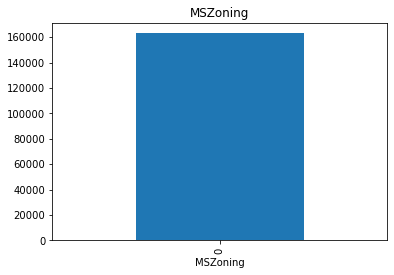

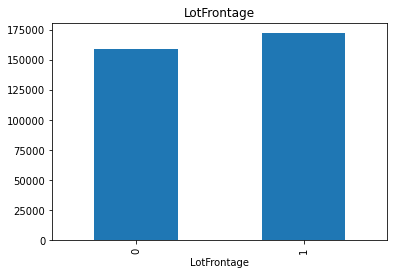

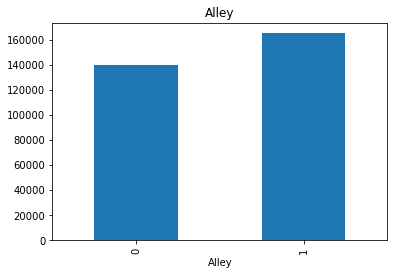

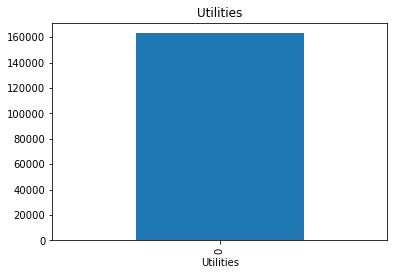

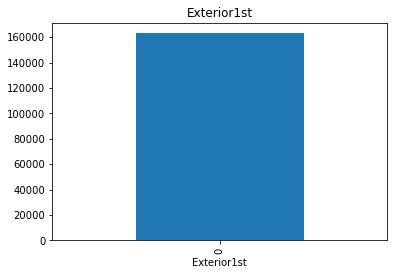

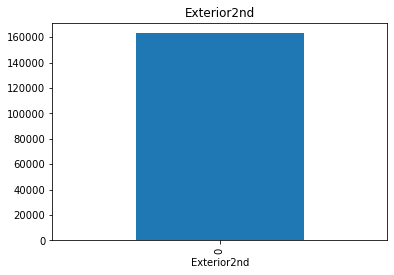

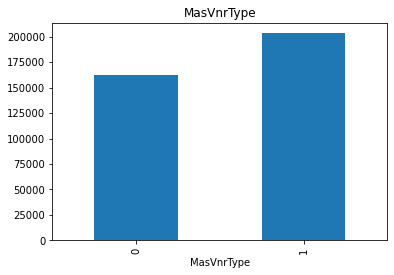

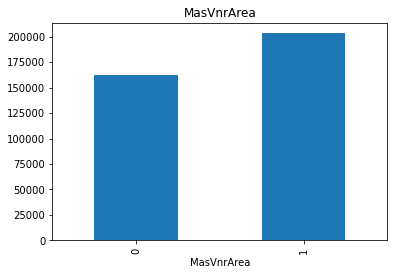

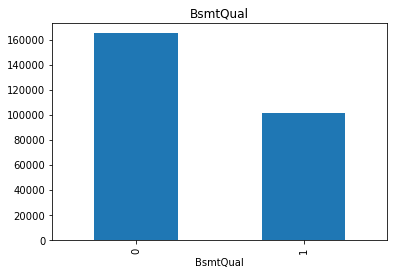

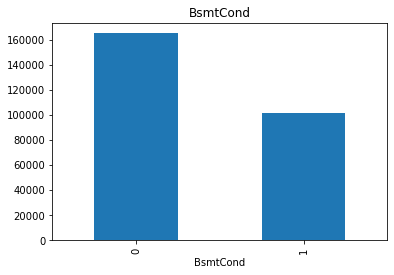

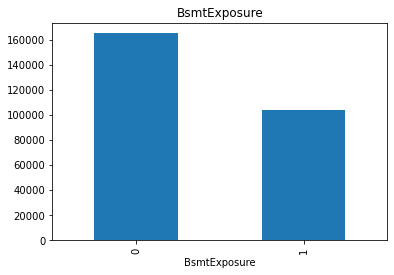

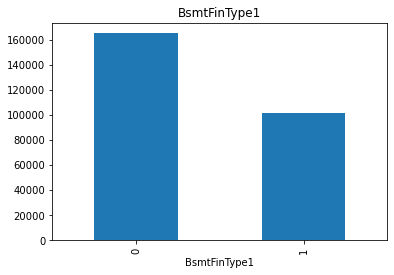

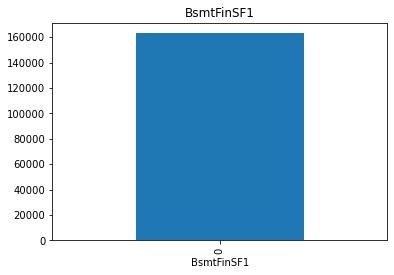

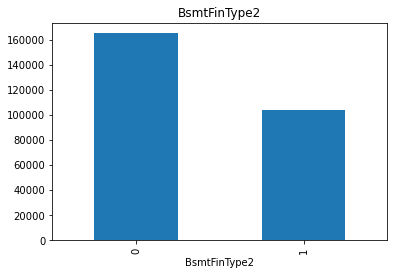

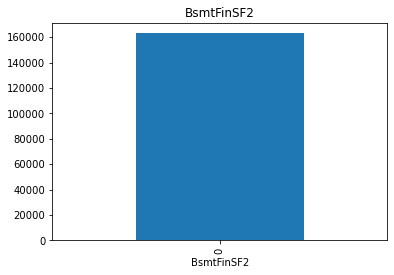

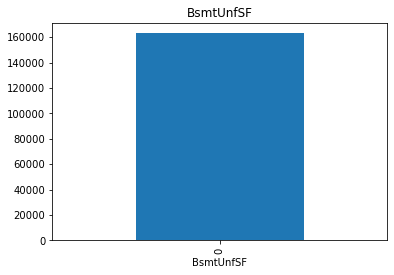

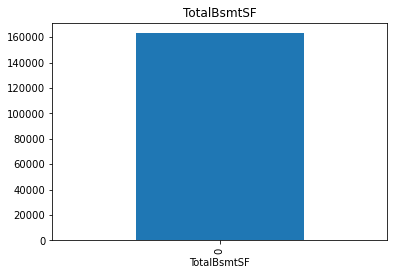

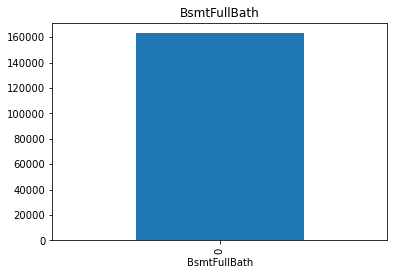

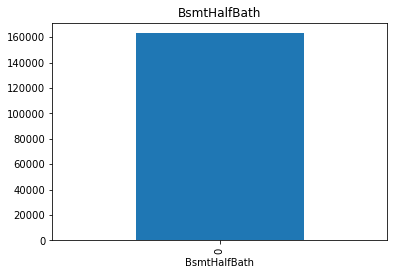

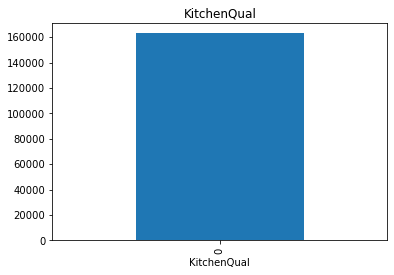

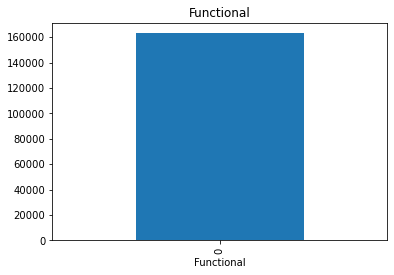

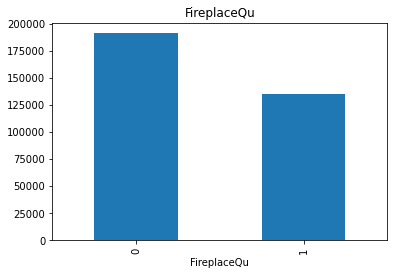

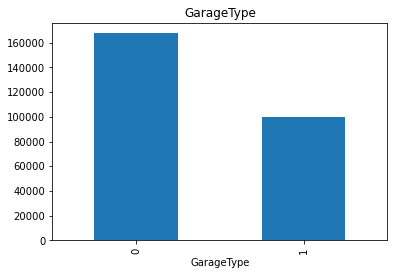

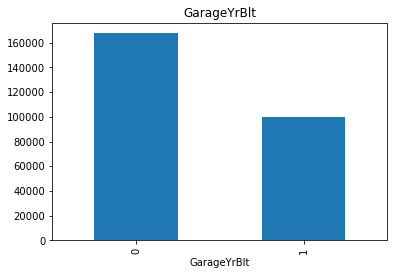

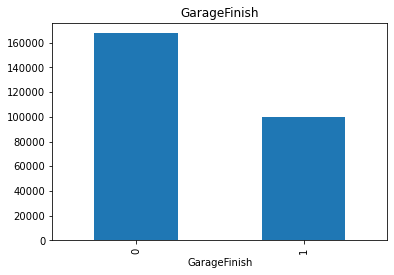

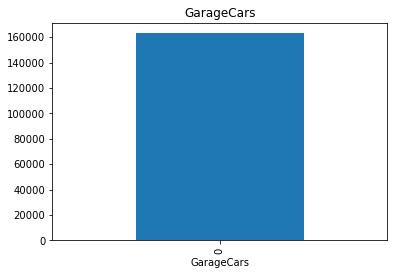

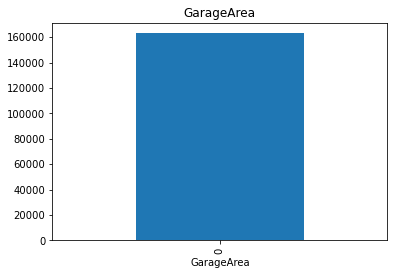

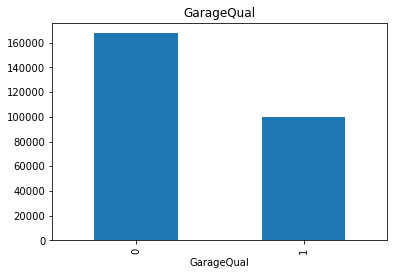

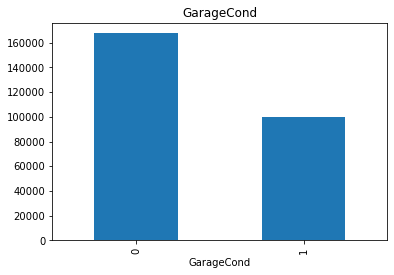

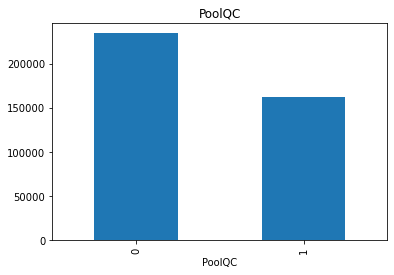

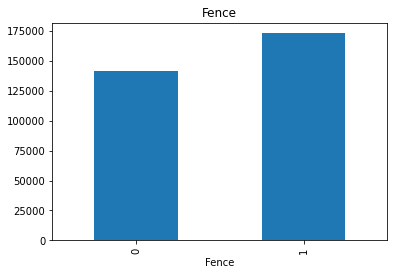

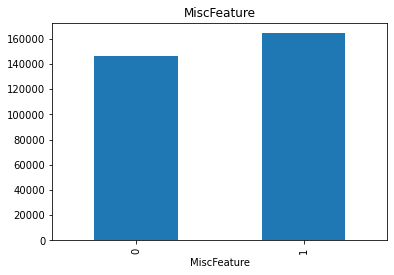

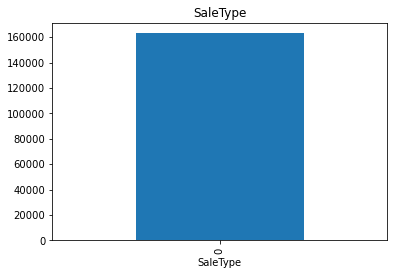

In [12]:
for f in null_feature:
    df= data.copy()
    df[f] = np.where(df[f].isnull(),1,0)
    df.groupby(f)['SalePrice'].median().plot(kind='bar')
    plt.title(f)
    plt.show()

### filling the null values in training dataset

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

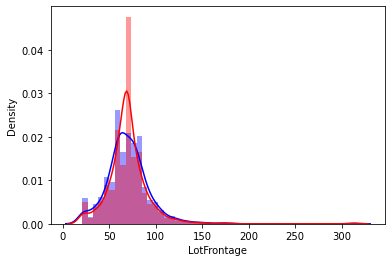

In [13]:
sns.distplot(data.LotFrontage,color='blue')
sns.distplot(data.LotFrontage.fillna(data.LotFrontage.median()),color='red')

In [14]:
data.LotFrontage.fillna(data.LotFrontage.median(),inplace=True)

In [15]:
test.LotFrontage.fillna(data.LotFrontage.median(),inplace=True)

In [16]:
data.Alley.fillna('NA',inplace=True)

In [17]:
data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [18]:
data.MasVnrArea.fillna(0,inplace = True)
data.MasVnrType.fillna('None',inplace=True)

In [19]:
print(data.BsmtQual.value_counts())
print(data.BsmtCond.value_counts())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


In [20]:
data.BsmtQual.fillna('NA',inplace =True)
data.BsmtCond.fillna("NA",inplace = True)

In [21]:
print(data.BsmtExposure.value_counts())
print(data.BsmtFinType1.value_counts())
print(data.BsmtFinType1.value_counts())

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


In [22]:
data.BsmtExposure.fillna('NA',inplace = True)
data.BsmtFinType1.fillna('NA',inplace = True)
data.BsmtFinType2.fillna('NA',inplace = True)

In [23]:
data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [24]:
data.Electrical.fillna('SBrkr',inplace = True)

In [25]:
data.FireplaceQu.fillna('NA',inplace = True)

In [26]:
data.GarageType.fillna('NA',inplace = True)
data.GarageFinish.fillna('NA',inplace = True)

In [27]:
data.GarageQual.fillna('NA',inplace = True)
data.GarageCond.fillna('NA',inplace = True)

In [28]:
data.GarageYrBlt.min()

1900.0

In [29]:
data.GarageYrBlt.fillna(1800,inplace = True) # to give impact of no garage 

In [30]:
data.PoolQC.fillna('NA',inplace = True)
data.Fence.fillna('NA',inplace = True)
data.MiscFeature.fillna('NA',inplace=True)

### filling the null values in testing dataset

In [31]:
test.MSZoning.fillna('RL',inplace=True)
test.LotFrontage.fillna(test.LotFrontage.median(),inplace=True)
test.Alley.fillna('NA',inplace=True)
test.Utilities.fillna('AllPub',inplace=True)
test.Exterior1st.fillna('VinylSd',inplace=True)
test.Exterior2nd.fillna('VinylSd',inplace=True)
test.MasVnrArea.fillna(0,inplace = True)
test.MasVnrType.fillna('None',inplace=True)
test.BsmtQual.fillna('NA',inplace =True)
test.BsmtCond.fillna("NA",inplace = True)
test.BsmtExposure.fillna('NA',inplace = True)
test.BsmtFinType1.fillna('NA',inplace = True)
test.BsmtFinType2.fillna('NA',inplace = True)
test.BsmtFinSF1.fillna(0,inplace=True)
test.BsmtFinSF2.fillna(0,inplace=True)
test.BsmtUnfSF.fillna(0,inplace = True)
test.TotalBsmtSF.fillna(0,inplace = True)
test.BsmtFullBath.fillna(0,inplace= True)
test.BsmtHalfBath.fillna(0,inplace= True)
test.KitchenQual.fillna('TA',inplace= True)
test.Functional.fillna('Typ',inplace = True)
test.FireplaceQu.fillna('NA',inplace= True)
test.GarageType.fillna('NA',inplace=True)
test.GarageYrBlt.fillna(1800,inplace= True)
test.GarageFinish.fillna('NA',inplace=True)
test.GarageCars.fillna(2,inplace=True)
test.GarageArea.fillna(test.GarageArea.mean(),inplace=True)
test.GarageCond.fillna('NA',inplace= True)
test.GarageQual.fillna('NA',inplace = True)
test.PoolQC.fillna('NA',inplace = True)
test.Fence.fillna('NA',inplace = True)
test.MiscFeature.fillna('NA',inplace=True)
test.SaleType.fillna('Oth',inplace = True)

In [32]:
null_feature = [i for i in data.columns if data[i].isnull().sum()>0]
for f in null_feature:
    print(f,'-',data[f].isnull().sum(),'-',data[f].isnull().mean())

In [33]:
null_feature = [i for i in test.columns if test[i].isnull().sum()>0]
for f in null_feature:
    print(f,'-',test[f].isnull().sum(),'-',test[f].isnull().mean())

In [34]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [35]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [36]:
# finding total no of months for different features like renovation, garage_built etc
data['Renovation']=np.where((data.YearRemodAdd - data.YearBuilt) != 0,1,0)
data['MonthsOfReno'] = (data.YrSold - data.YearRemodAdd)*12 + data.MoSold
data['MonthsOfBld'] = (data.YrSold - data.YearBuilt)*12 + data.MoSold
data['MonthsOfGarage'] = (data.YrSold -data.GarageYrBlt)*12 + data.MoSold

In [37]:
test['Renovation']=np.where((test.YearRemodAdd - test.YearBuilt) != 0,1,0)
test['MonthsOfReno'] = (test.YrSold - test.YearRemodAdd)*12 + test.MoSold
test['MonthsOfBld'] = (test.YrSold - test.YearBuilt)*12 + test.MoSold
test['MonthsOfGarage'] = (test.YrSold -test.GarageYrBlt)*12 + test.MoSold

In [38]:
del data['YrSold']
del data['YearRemodAdd']
del data['YearBuilt']
del data['GarageYrBlt']
del data['Id']
del data['MoSold']

In [39]:
del test['YrSold']
del test['YearRemodAdd']
del test['YearBuilt']
del test['GarageYrBlt']
del test['Id']
del test['MoSold']

**here, months of garage>2000 suggests that it has not garage as I have replaced the null value of GarageYrBlt with 1800 which is almost 100 year less than the min value of year present in dataset.**

In [40]:
data['MonthsOfGarage'][data.MonthsOfGarage>2000] = 0 

In [41]:
test['MonthsOfGarage'][test.MonthsOfGarage>2000] = 0

### Correlation matrix

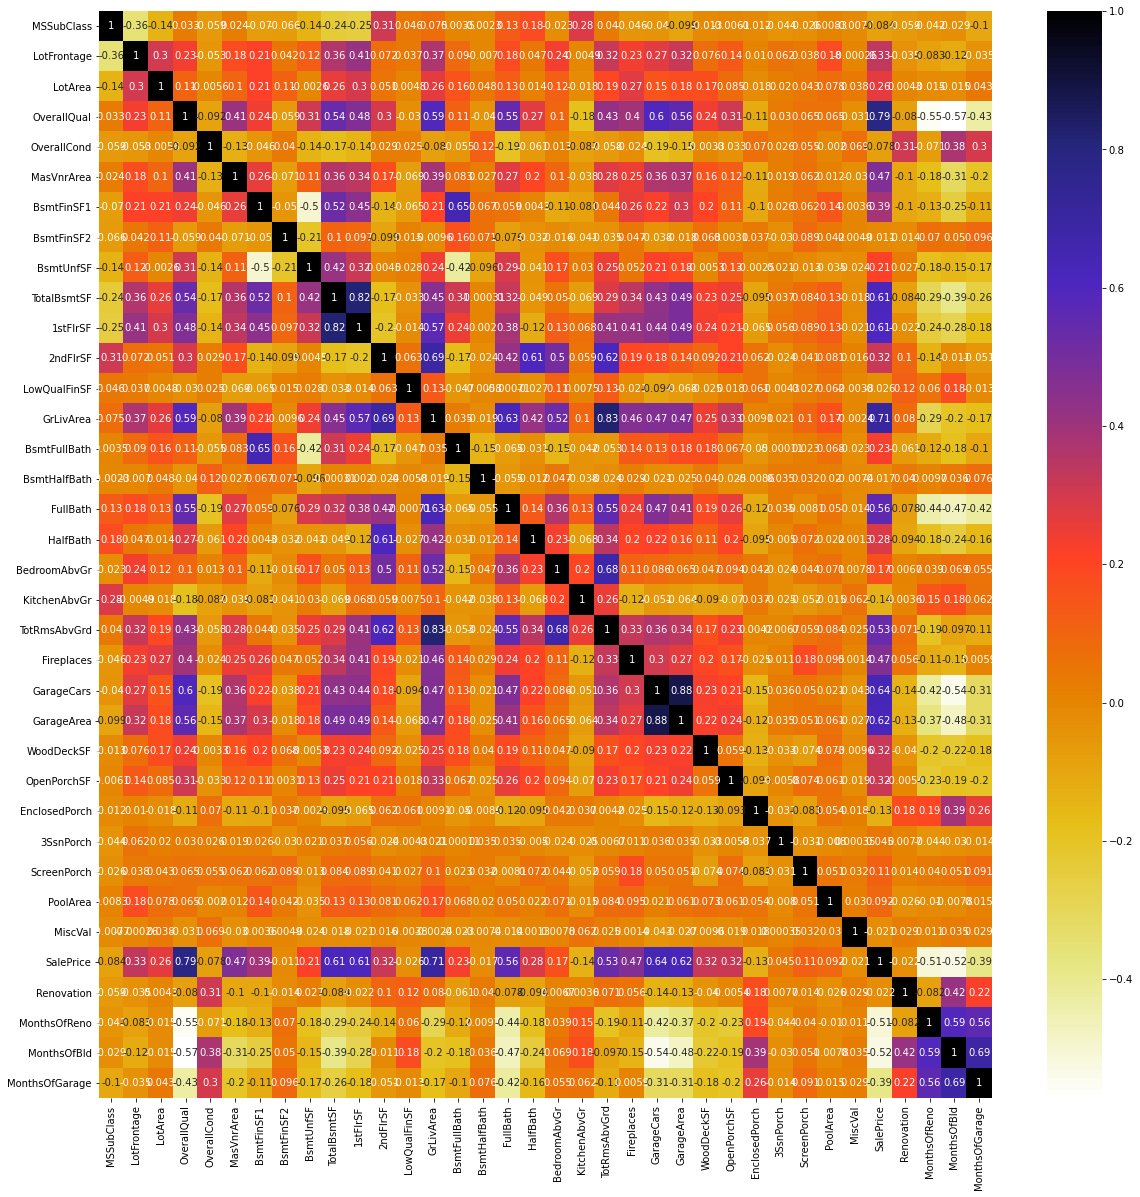

In [42]:
cor = data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot = True,cmap = plt.cm.CMRmap_r)
plt.show()

### to remove the columns with positive or negative correlation of more than a particular threshold

In [48]:
def correlation(corr_matrix,threshold):
    col = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col.add(col_name)
    return list(col)

In [53]:
print('columns with positive or negative correlation of more than 0.9 -> ',len(correlation(cor,0.9)))

columns with positive or negative correlation of more than 0.9 ->  0


In [54]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Renovation,MonthsOfReno,MonthsOfBld,MonthsOfGarage
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,WD,Normal,208500,0,62,62,62.0
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,WD,Normal,181500,0,377,377,377.0
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,WD,Normal,223500,1,81,93,93.0
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,WD,Abnorml,140000,1,434,1094,98.0
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,WD,Normal,250000,0,108,108,108.0


### making a dictionary to map different categorical variable

In [55]:
dict = {
'MSZoning_map' : {'A':1,'C (all)':2,'FV':3,'I':4,'RH':5,'RL':6,'RP':7,'RM':8},
'Street_map' : {'Grvl':1,'Pave':2},
'Alley_map' : {'Grvl':1,'Pave':2,'NA':3},
'LotShape_map' : {'Reg':1,'IR1':2,'IR2':3,'IR3':4},
'LandContour_map' : {'Lvl':1,'Bnk':2,'HLS':3,'Low':4},
'Utilities_map' : {'AllPub':1,'NoSewr':2,'NoSeWa':3,'ELO':4},
'LotConfig_map': {'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5},
'LandSlope_map' : {'Gtl':1,'Mod':2,'Sev':3},
'Neighborhood_map':{'Blmngtn':1,'Blueste':2,'BrDale':3,'BrkSide':4,'ClearCr':5,'CollgCr':6,'Crawfor':7,'Edwards':8,'Gilbert':9,'IDOTRR':10,'MeadowV':11,'Mitchel':12,'NAmes':13,'NoRidge':14,'NPkVill':15,'NridgHt':16,'NWAmes':17,'OldTown':18,'SWISU':19,'Sawyer':20,'SawyerW':21,'Somerst':22,'StoneBr':23,'Timber':24,'Veenker':25},
'Condition1_map' :{'Artery':1,'Feedr':2,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9},
'Condition2_map': {'Artery':1,'Feedr':2,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9},
'BldgType_map' :{'1Fam':1,'2fmCon':2,'Duplex':3,'TwnhsE':4,'Twnhs':5},
'HouseStyle_map':{'1Story':1,'1.5Fin':2,'1.5Unf':3,'1.5Unf':4,'2.5Fin':5,'2.5Unf':6,'SFoyer':7,'SLvl':8,'2Story':9},
'RoofStyle_map':{'Flat':1,'Gable':2,'Gambrel':3,'Hip':4,'Mansard':5,'Shed':6},
'RoofMatl_map' :{'ClyTile':1,'CompShg':2,'Membran':3,'Metal':4,'Roll':5,'Tar&Grv':6,'WdShake':7,'WdShngl':8},
'Exterior1st_map':{'AsbShng':1,'AsphShn':2,'BrkComm':3,'BrkFace':4,'CBlock':5,'ImStucc':6,'CemntBd':7,'HdBoard':8,'MetalSd':9,'Other':10,'Plywood':11,'PreCast':12,'Stone':13,'Stucco':14,'VinylSd':15,'Wd Sdng':16,'WdShing':17},
'Exterior2nd_map':{'AsbShng':1,'AsphShn':2,'Brk Cmn':3,'BrkFace':4,'CBlock':5,'ImStucc':6,'CmentBd':7,'HdBoard':8,'MetalSd':9,'Other':10,'Plywood':11,'PreCast':12,'Stone':13,'Stucco':14,'VinylSd':15,'Wd Sdng':16,'WdShing':17},
'MasVnrType_map':{'BrkCmn':1,'BrkFace':2,'CBlock':3,'None':4,'Stone':5},
'ExterQual_map':{'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5},
'ExterCond_map':{'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5},
'Foundation_map':{'BrkTil':1,'CBlock':2,'PConc':3,'Slab':4,'Stone':5,'Wood':6},
'BsmtQual_map':{'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6},
'BsmtCond_map':{'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6},
'BsmtExposure_map':{'Gd':1,'Av':2,'Mn':3,'No':4,'NA':5},
'BsmtFinType1_map':{'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'NA':7},
'BsmtFinType2_map':{'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'NA':7},
'Heating_map':{'Floor':1,'GasA':2,'GasW':3,'Grav':4,'OthW':5,'Wall':6},
'HeatingQC_map':{'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5},
'CentralAir_map':{'N':1,'Y':2},
'Electrical_map':{'SBrkr':1,'FuseA':2,'FuseF':3,'FuseP':4,'Mix':5},
'KitchenQual_map':{'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5},
'Functional_map':{'Typ':1,'Min1':2,'Min2':3,'Mod':4,'Maj1':5,'Maj2':6,'Sev':7,'Sal':8},
'FireplaceQu_map':{'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6},
'GarageType_map':{'2Types':1,'Attchd':2,'Basment':3,'BuiltIn':4,'CarPort':5,'Detchd':6,'NA':7},
'GarageFinish_map':{'Fin':1,'RFn':2,'Unf':3,'NA':4},
'GarageQual_map':{'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6},
'GarageCond_map':{'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6},
'PavedDrive_map':{'Y':1,'N':2,'P':3},
'PoolQC_map':{'Ex':1,'Gd':2,'TA':3,'Fa':4,'NA':5},
'Fence_map':{'GdPrv':1,'MnPrv':2,'GdWo':3,'MnWw':4,'NA':5},
'MiscFeature_map':{'Elev':1,'Gar2':2,'Othr':3,'Shed':4,'TenC':5,'NA':6},
'SaleType_map' : {'WD':1,'CWD':2,'VWD':3,'New':4,'COD':5,'Con':6,'ConLw':7,'ConLI':8,'ConLD':9,'Oth':10},
'SaleCondition_map':{'Normal':1,'Abnorml':2,'AdjLand':3,'Alloca':4,'Family':5,'Partial':6}
    }

In [56]:
data.Exterior2nd[data.Exterior2nd== 'Wd Shng'] = 'Wd Sdng'

In [57]:
test.Exterior2nd[test.Exterior2nd== 'Wd Shng']  = 'Wd Sdng'

### mapping the features in the dictionary on train and test dataset

In [58]:
for i in dict:
    feat_name = i[:-4]
    data[feat_name] = data[feat_name].map(dict[i])

In [59]:
for i in dict:
    feat_name = i[:-4]
    test[feat_name] = test[feat_name].map(dict[i])

In [60]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Renovation,MonthsOfReno,MonthsOfBld,MonthsOfGarage
0,60,6,65.0,8450,2,3,1,1,1,1,1,6,3,3,1,9,7,5,2,2,15,15,2,196.0,2,3,3,2,3,4,1,706,6,0,150,856,2,1,2,1,856,854,0,1710,1,0,2,1,3,1,2,8,1,0,6,2,2,2,548,3,3,1,0,61,0,0,0,0,5,5,6,0,1,1,208500,0,62,62,62.0
1,20,6,80.0,9600,2,3,1,1,1,4,1,25,2,3,1,1,6,8,2,2,9,9,4,0.0,3,3,2,2,3,1,2,978,6,0,284,1262,2,1,2,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1,3,2,2,2,460,3,3,1,298,0,0,0,0,0,5,5,6,0,1,1,181500,0,377,377,377.0
2,60,6,68.0,11250,2,3,2,1,1,1,1,6,3,3,1,9,7,5,2,2,15,15,2,162.0,2,3,3,2,3,3,1,486,6,0,434,920,2,1,2,1,920,866,0,1786,1,0,2,1,3,1,2,6,1,1,3,2,2,2,608,3,3,1,0,42,0,0,0,0,5,5,6,0,1,1,223500,1,81,93,93.0
3,70,6,60.0,9550,2,3,2,1,1,2,1,7,3,3,1,9,7,5,2,2,16,16,4,0.0,3,3,1,3,2,4,2,216,6,0,540,756,2,2,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,1,1,2,6,3,3,642,3,3,1,0,35,272,0,0,0,5,5,6,0,1,2,140000,1,434,1094,98.0
4,60,6,84.0,14260,2,3,2,1,1,4,1,14,3,3,1,9,8,5,2,2,15,15,2,350.0,2,3,3,2,3,2,1,655,6,0,490,1145,2,1,2,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,1,3,2,2,3,836,3,3,1,192,84,0,0,0,0,5,5,6,0,1,1,250000,0,108,108,108.0


### to check if null values are present or not 

In [61]:
null_feature = [i for i in data.columns if data[i].isnull().sum()>0]
for f in null_feature:
    print(f,'-',data[f].isnull().sum(),'-',data[f].isnull().mean())

In [62]:
null_feature = [i for i in test.columns if test[i].isnull().sum()>0]
for f in null_feature:
    print(f,'-',test[f].isnull().sum(),'-',test[f].isnull().mean())

In [63]:
x= data.drop('SalePrice',axis=1)
y= data['SalePrice']

### spliting the data for training and testing

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0 ,test_size = 0.2)

In [65]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1168, 78), (292, 78), (1168,), (292,))

###  scaling the data

In [66]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
test_final = scaler.transform(test)

### XGBoost regressor with hyperparameter tuning

In [68]:
xgb_params = {
    'max_depth': [int(i) for i in np.linspace(2,10,5)],
    'min_child_weight':[int(i) for i in np.linspace(2,10,5)],
    'gamma' : [i for i in np.linspace(0.0,0.5,6)],
    'subsample' : [ i for i in np.linspace(0.6,1.0,9)],
    'colsample_bytree' : [i for i in np.linspace(0.6,1.0,9)],
    'reg_lambda' : [0.01,0.1,1.0,10,20],
    'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3]
}
xgb_params

{'max_depth': [2, 4, 6, 8, 10],
 'min_child_weight': [2, 4, 6, 8, 10],
 'gamma': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5],
 'subsample': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
 'colsample_bytree': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0],
 'reg_lambda': [0.01, 0.1, 1.0, 10, 20],
 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

In [69]:
xgb = XGBRegressor()
xgb_hptune = RandomizedSearchCV(xgb,xgb_params,cv=5,random_state = 0,n_iter = 200,n_jobs = -1,verbose = 2)
xgb_hptune.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.65, 0.7,
                                                             0.75, 0.8,

In [70]:
xgb_hptune.best_params_

{'subsample': 0.6,
 'reg_lambda': 10,
 'min_child_weight': 10,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 1.0}

In [73]:
print(xgb_hptune.score(x_test,y_test))
pred_final = xgb_hptune.predict(test_final)
df = pd.read_csv('test.csv')
submission = pd.DataFrame(df['Id'])
submission['SalePrice'] = pred_final
submission.to_csv('house_price_prediction.csv',index=False)

0.8484424729651816


In [72]:
y_pred = xgb_hptune.predict(x_test)
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,y_pred)

0.019417045365827647